# Project: Investigate a Dataset TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user **ratings** and **revenue**.


### Question(s) for Analysis
> I will explore the movie data to answer the following questions:
 - who is the best director and actor get the most revenue and profit? and what is his/her movies ratings and popularity?
 - Top 10 actors showed in movies and directors they gained revenue and profit
 - Top 10 popular actors based on their movies
 - what is the best genres gain the most revenue, profit and popularity?
 - Top 10 frequent casts, directors, geners 
 - Do the movie's viewer rates could be used to determine a profitable actor or genres?
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here will go through the movie data and explore and check for cleanliness.


In [2]:
# Load TMDB Movie
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# read data info
df.shape,  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

((10866, 21), None)


### Data Cleaning
> I will start the cleaning process as following:
 - **First** remove all unwanted columns so I can focus on what is necessry to answer the questions.
 - **Second** will remove all NaNs as they are few rows.
 - **Third** will remove duplicates rows
 - **Forth** will set the first value of multiple values that saperated by `|` in `cast`, `director` and `genres` columns.
 - **Fifth** will convert the `revenue_adj` and `budget_adj` from float to int.

In [4]:
# Start cleaning the data with get rid of unwanted columns 
df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
# find the NaNs 
df.isnull().sum()

popularity       0
budget           0
revenue          0
cast            76
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [6]:
# as shown that there are few NaN, will remove them.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity      10732 non-null float64
budget          10732 non-null int64
revenue         10732 non-null int64
cast            10732 non-null object
director        10732 non-null object
runtime         10732 non-null int64
genres          10732 non-null object
vote_count      10732 non-null int64
vote_average    10732 non-null float64
release_year    10732 non-null int64
budget_adj      10732 non-null float64
revenue_adj     10732 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [7]:
# find the duplicates
df.duplicated().sum()

1

In [8]:
# remove the duplicated row
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
popularity      10731 non-null float64
budget          10731 non-null int64
revenue         10731 non-null int64
cast            10731 non-null object
director        10731 non-null object
runtime         10731 non-null int64
genres          10731 non-null object
vote_count      10731 non-null int64
vote_average    10731 non-null float64
release_year    10731 non-null int64
budget_adj      10731 non-null float64
revenue_adj     10731 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [9]:
# in 'cast' will remove '|' and replace hole value just first value of series
df_cast = df[df.cast.str.contains('\|')]
df_cast['cast'] = df_cast.cast.apply(lambda x: x.split('|')[0])
df_cast.head(3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Tom Hardy,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Shailene Woodley,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08


In [10]:
# then drop old rows from df and replace it with the new rows of df_cast
df.drop(df[df.cast.str.contains('\|')].index, axis=0, inplace=True)
df = df.append(df_cast, ignore_index=True)
df.head(2)

,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0.357654,0,0,Cristiano Ronaldo,Anthony Wonke,0,Documentary,80,6.5,2015,0.0,0.000000e+00
1,0.348306,0,16661077,Tina Fey,Mark Linfield|Alastair Fothergill,81,Animation|Documentary,39,6.3,2015,0.0,1.532818e+07


In [11]:
# same here will apply this process on 'director' as I did with 'cast'
df_dir = df[df.director.str.contains('\|')]
df_dir['director'] = df_dir.director.apply(lambda x: x.split('|')[0])
df_dir.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,0.348306,0,16661077,Tina Fey,Mark Linfield,81,Animation|Documentary,39,6.3,2015,0.0,1.532818e+07
9,0.080754,0,44695,Noam Chomsky,Jared P. Scott,73,Documentary,24,7.8,2015,0.0,4.111938e+04


In [12]:
# same here will replace the old rows with new rows
df.drop(df[df.director.str.contains('\|')].index, axis=0, inplace=True)
df = df.append(df_dir, ignore_index=True)
df.shape

(10731, 12)

In [13]:
#here last column will do the same process with is 'genres'
df_gen = df[df.genres.str.contains('\|')]
df_gen['genres'] = df_gen.genres.apply(lambda x: x.split('|')[0])
df_gen.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
4,0.106091,0,0,Sammy Silverwatch,David Sington,96,Thriller,19,8.2,2015,0.0,0.0
16,0.025920,0,0,Laura Dekker,Jillian Schlesinger,82,Adventure,16,7.2,2014,0.0,0.0


In [14]:
# romve old rows and add the rows
df.drop(df[df.genres.str.contains('\|')].index, axis=0, inplace=True)
df = df.append(df_gen, ignore_index=True)
df.shape

(10731, 12)

In [15]:
# convert budget_adj and revenue_adj from float to int
df['budget_adj'] = df.budget_adj.astype('int64')
df['revenue_adj'] = df.revenue_adj.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 12 columns):
popularity      10731 non-null float64
budget          10731 non-null int64
revenue         10731 non-null int64
cast            10731 non-null object
director        10731 non-null object
runtime         10731 non-null int64
genres          10731 non-null object
vote_count      10731 non-null int64
vote_average    10731 non-null float64
release_year    10731 non-null int64
budget_adj      10731 non-null int64
revenue_adj     10731 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1006.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### Research Question 1 , 2, 3: 
#### Q1: Who is the best director and actor get the most revenue and profit? and what is his/her movies ratings and popularity?
#### Q2: Top 10 actors showed in movies and directors they gained revenue and profit
#### Q3: Top 10 popular actors based on their movies

In [16]:
# first will get the profit of movies
df['profit'] = df['revenue'] - df['budget']
# and wil get the profit_adj after doller inflation in 2010
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head(2)

,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,0.357654,0,0,Cristiano Ronaldo,Anthony Wonke,0,Documentary,80,6.5,2015,0,0,0,0
1,0.129455,0,0,Robert De Niro,JR,14,Drama,15,7.2,2015,0,0,0,0


In [17]:
#will group the actors by sum of revenues in movies they showed up in it to find the most revnue gain by actor
df_cast_re = df.groupby('cast').revenue.sum()
print('The most actor gained revneue is:', df_cast_re.idxmax(), '\n Actor Revenue:', df_cast_re.loc[df_cast_re.idxmax()])
print()
# Will do the same here to get the profit
df_cast_profit = df.groupby('cast').profit.sum()
print('The most actor achieved profit is:', df_cast_profit.idxmax(), '\n Actor Revenue:', df_cast_profit.loc[df_cast_profit.idxmax()])
print()
# Will get his avarage ratings for each
top_rev_act_rate = df.groupby('cast').vote_average.mean()[df_cast_re.idxmax()]
top_rev_act_pop = df.groupby('cast').popularity.mean()[df_cast_re.idxmax()]
print('Actor:', df_cast_re.idxmax() , '\n Average movies ratings:', top_rev_act_rate, '\n Average movies popularity:', top_rev_act_pop )
print()
top_pro_act_rate = df.groupby('cast').vote_average.mean()[df_cast_profit.idxmax()]
top_pro_act_pop = df.groupby('cast').popularity.mean()[df_cast_profit.idxmax()]
print('Actor:', df_cast_profit.idxmax() , '\n Average movies ratings:', top_pro_act_rate, '\n Average movies popularity:', top_pro_act_pop ) 

The most actor gained revneue is: Tom Cruise 
 Actor Revenue: 8034128433

The most actor achieved profit is: Daniel Radcliffe 
 Actor Revenue: 6515779393

Actor: Tom Cruise 
 Average movies ratings: 6.35483870968 
 Average movies popularity: 1.69761006452

Actor: Daniel Radcliffe 
 Average movies ratings: 6.94285714286 
 Average movies popularity: 3.62655157143


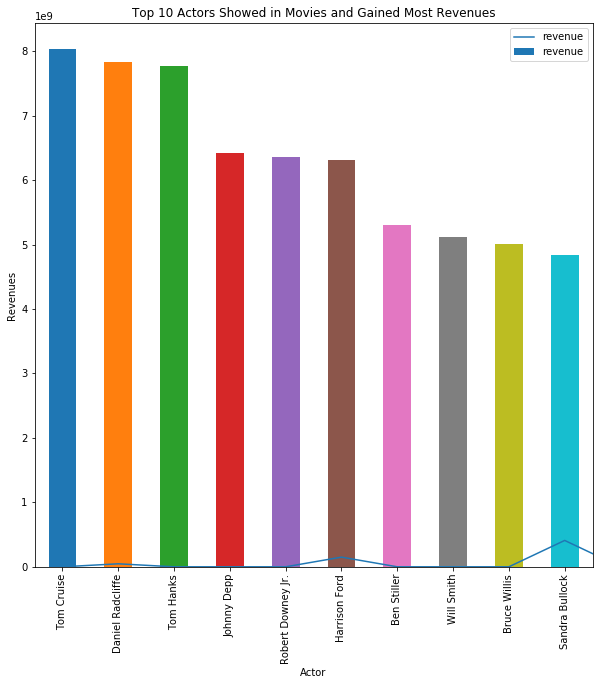

In [18]:
# here will answer for the second question of top 10 actors, will use the bar chart for that. for top revenuer actors:
df_cast_re.plot(figsize=(10,10))
df_cast_re.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Revenues')
plt.xlabel('Actor')
plt.title('Top 10 Actors Showed in Movies and Gained Most Revenues')
plt.legend();

In the above bar chart I found that the most three actros gained revenues are **Tom Cruise, Daniel Radcliffe and Tom Hanks** who are in same level. And next three in same level of gaining revenues are **Johnny Depp, Robert Downey Jr. and Harrison Ford**

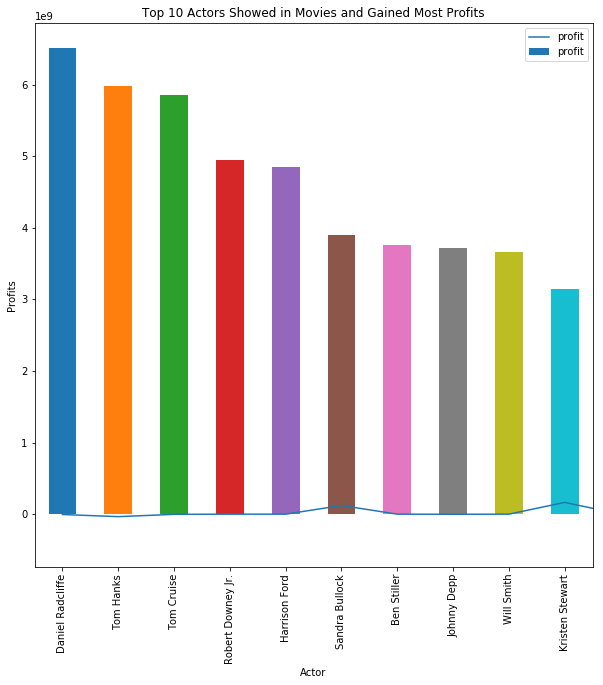

In [19]:
#Top 10 profiteer actors
df_cast_profit.plot(figsize=(10,10))
df_cast_profit.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Profits')
plt.xlabel('Actor')
plt.title('Top 10 Actors Showed in Movies and Gained Most Profits')
plt.legend();

In the above bar chart shows that the top profitable actor is **Daniel Redcliffe** then **Tom Hanks and Tom Cruise** are in same level of making profits

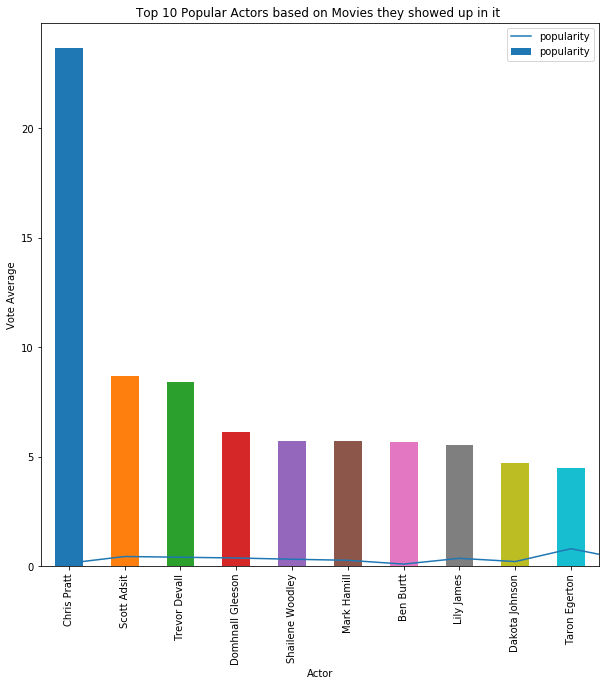

In [20]:
# Answer Q3: Top 10 popular actors based on their movies
df_rated_cast = df.groupby('cast').popularity.mean()
df_rated_cast.plot(figsize=(10,10))
df_rated_cast.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Vote Average')
plt.xlabel('Actor')
plt.title('Top 10 Popular Actors based on Movies they showed up in it ')
plt.legend();

In the above chart, the most popular actor is **Chris Pratt** then **Scott Adsit and Trevor Devall** are popular in same level but that data doesn't related to making revenues and achive profits

In [21]:
# as I did with cast will do the same with directors
df_dir_re = df.groupby('director').revenue.sum()
print('The most director gained revneue is:', df_dir_re.idxmax(), '\n Director Revenue:', df_dir_re.loc[df_dir_re.idxmax()])
print()
df_dir_pr = df.groupby('director').profit.sum()
print('The most director achieved profit is:', df_dir_pr.idxmax(), '\n Director Revenue:', df_dir_pr.loc[df_dir_pr.idxmax()])
print()
top_rev_dir_rate = df.groupby('director').vote_average.mean()[df_dir_re.idxmax()]
top_rev_dir_pop = df.groupby('director').popularity.mean()[df_dir_re.idxmax()]
print('Actor:', df_dir_re.idxmax() , '\n Average movies ratings:', top_rev_dir_rate, '\n Average movies popularity:', top_rev_dir_pop )

The most director gained revneue is: Steven Spielberg 
 Director Revenue: 9018563772

The most director achieved profit is: Steven Spielberg 
 Director Revenue: 7428613772

Actor: Steven Spielberg 
 Average movies ratings: 6.82413793103 
 Average movies popularity: 1.87513775862


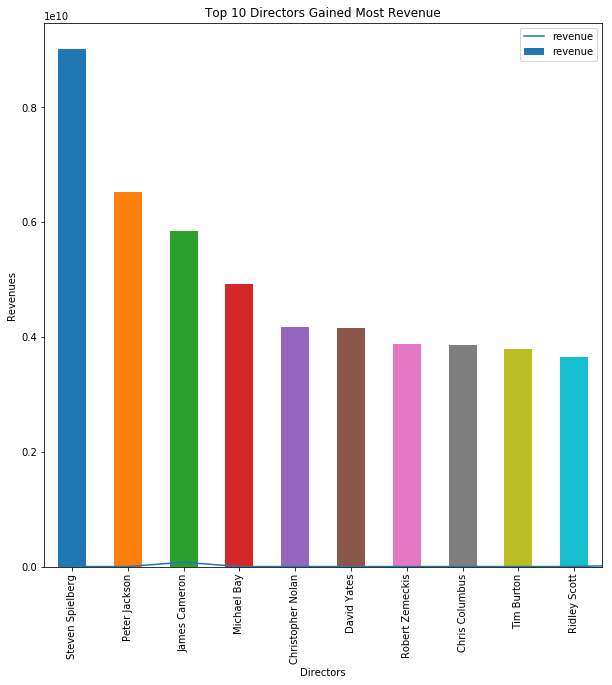

In [22]:
# Will show the top 10 Directors gained most revenues
df_dir_re.plot(figsize=(10,10))
df_dir_re.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Revenues')
plt.xlabel('Directors')
plt.title('Top 10 Directors Gained Most Revenue')
plt.legend();

in this chart I demonstrate the revenues by directors and get top 10 gained revenues of all time

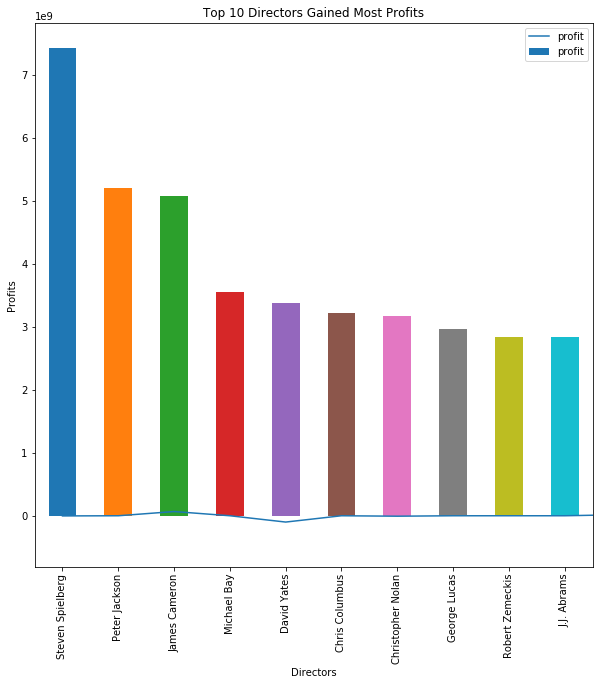

In [23]:
# here too will show top 10 directors gained most profits
df_dir_pr.plot(figsize=(10,10))
df_dir_pr.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Profits')
plt.xlabel('Directors')
plt.title('Top 10 Directors Gained Most Profits')
plt.legend();

In the above charts I found that the most directors gained revnues are Steven Spielberg. he got the heights revenues and profits, then Peter Jackson and James Cameron They are in same level in gaining revenues. However,  James Cameron is spending less than Peter Jackson.

### Research Question 4  : 
#### Q4: what is the best movies based on genres gain the most revenue, profit and popularity?

In [24]:
#here will get the most genres by revenue and profit
df_gen_re = df.groupby('genres').revenue.sum()
print('The most genre of movies get revenues:', df_gen_re.idxmax(), ", USD",df_gen_re.loc[df_gen_re.idxmax()])
df_gen_pr = df.groupby('genres').profit.sum()
print('The most genre of movies get profits:', df_gen_pr.idxmax(), ", USD",df_gen_pr.loc[df_gen_pr.idxmax()])
df_gen_pop = df.groupby('genres').popularity.mean()
print('The most popular genres is:', df_gen_pop.idxmax(), df_gen_pop.loc[df_gen_pop.idxmax()])

The most genre of movies get revenues: Action , USD 96606072845
The most genre of movies get profits: Action , USD 57418137853
The most popular genres is: Adventure 1.21983381368


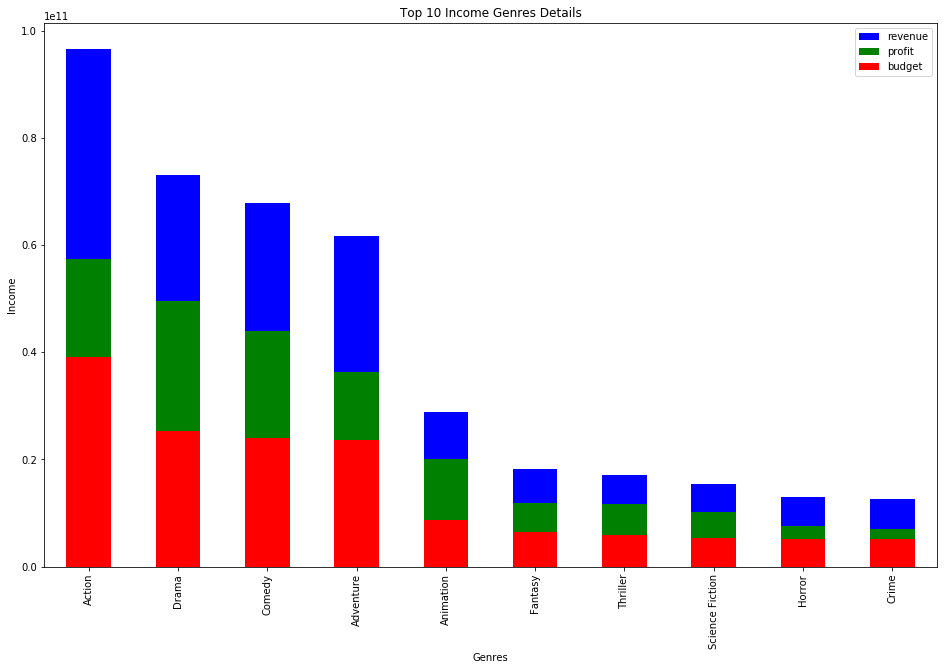

In [25]:
# Genres plotting by income analysis 
df_gen_bu = df.groupby('genres').budget.sum()
plt.figure(figsize=(16,10))
df_gen_re.sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
df_gen_pr.sort_values(ascending=False)[:10].plot(kind='bar', color='Green')
df_gen_bu.sort_values(ascending=False)[:10].plot(kind='bar', color='Red')
plt.ylabel('Income')
plt.xlabel('Genres')
plt.title('Top 10 Income Genres Details')
plt.legend();

Action is hightest achived revenues but not the profitable one as it production costs is high. on other hand, the genres **Drama, Comedy and Adventure** are in same level of budgets but the **Drama** genres are the most profitable genres of all time

### Research Question 5  : 
#### Q5:Top 10 frequent casts, directors, geners 

In [26]:
#will built a function to use to avoid repative codes and show 1D arrays to answer the question 
def demo (df,x):
    '''
    function purpose:  visualise the top 10 frequent values in column (x)
    inputs: selected dataframe column
    outputs: top 10 value counts in certain column visualise by Pie chart
    '''
    #plot top 10
    df[x].value_counts()[:10].plot(kind='pie', figsize=(10,10))
    #add title
    plt.title(f'top 10 {x} by count'.title(), fontsize=14, weight='bold', horizontalalignment='right')
    # remove ylable
    plt.ylabel('')
    # center plot
    plt.axis('equal');

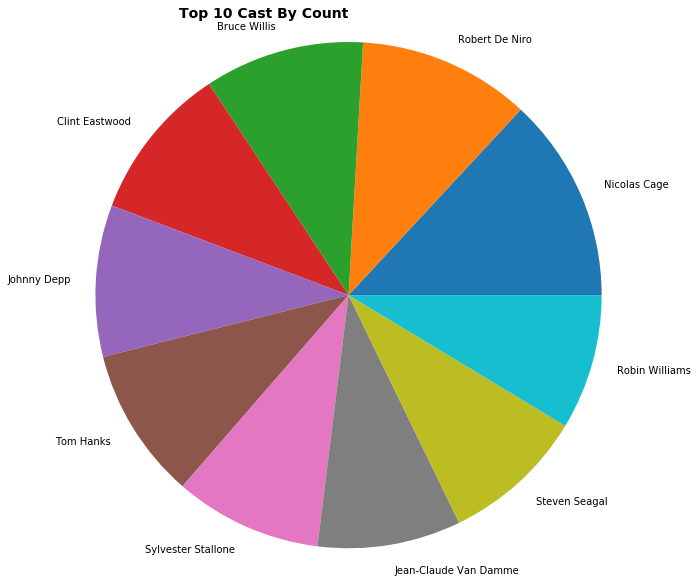

In [27]:
demo(df,'cast')

In this above chart shows the top 10 Actor that showed up in movies

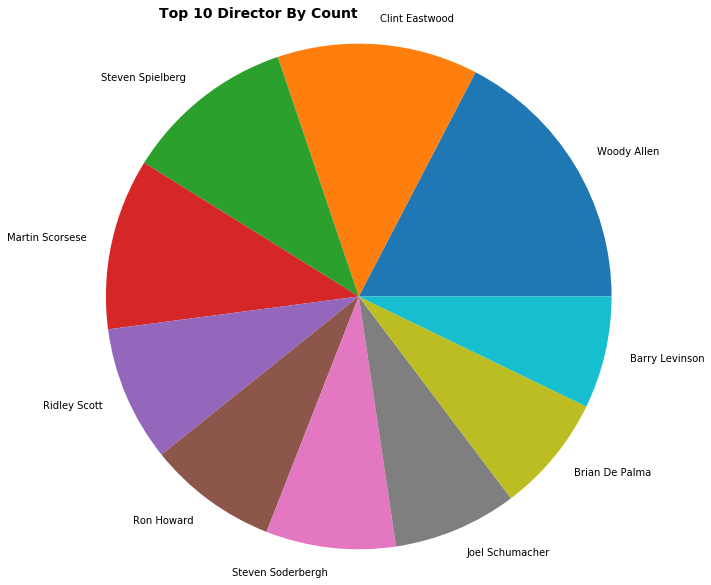

In [28]:
demo(df,'director')

This pie chart show the top 10 directors who have directed top number of movies.

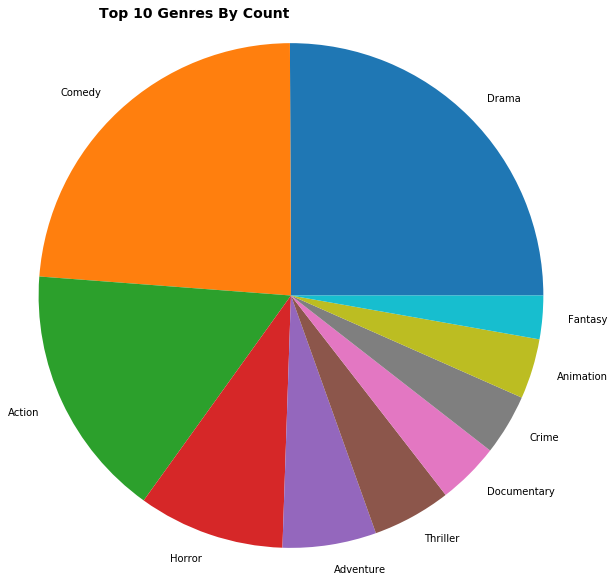

In [34]:
demo(df,'genres')

The chart above shows the 10 most counted movie genres

### Research Question 6  : 
#### Q6: Do the movie's viewer rates could be used to determine a profitable Actor or genres?

In [ ]:
# first will get the heighest voted actor on all movies that he/she showed up in it
df_vote_c = df.groupby('cast').vote_average.mean()
print('The hightest reated actor is:', df_vote_c.idxmax(), 'with average:', df_vote_c.loc[df_vote_c.idxmax()])

In [35]:
# Second will get the counts of votes that get the hightest rated actor
df_act = df.groupby('cast').vote_count.sum()
print(df_act.loc[df_vote_c.idxmax()], 'Vote counts for' ,df_vote_c.idxmax(),'the hightest rated actore')

14 Vote counts for Mark Cousins the hightest rated actore


In [36]:
#Same here with genres as we did with actors
df_vote_g = df.groupby('genres').vote_average.mean()
print('The hightest reated genres is', df_vote_g.idxmax(), 'with average:', df_vote_g.loc[df_vote_g.idxmax()])

The hightest reated genres is Documentary with average: 6.91317829457


In [37]:
df_genres = df.groupby('genres').vote_count.sum()
print(df_genres.loc[df_vote_g.idxmax()], 'Vote counts for' ,df_vote_g.idxmax(),'the hightest rated genres')

13842 Vote counts for Documentary the hightest rated genres


<a id='conclusions'></a>
## Conclusions

> if you going to make a movie you should make action movie as it the most profitable genres and movie cast should include Tom Cruise and to be directed by to Steven Spielberg grantee the most profit.  

> As shown in the question 6 that this data is limited by `vote_count` and `vote_average` as we can't count on them for determining which actor or genres are profitable. in this part i would suggest to gather more than one resources on movie rating to give clear insights 


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0